This is a Logistic Regression model for the prediction of Survival in the Titanic Ship

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *

plt.style.use('deeplearning.mplstyle')

2025-01-19 23:05:38.422464: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 23:05:38.432626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737324338.443575   21541 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737324338.446843   21541 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 23:05:38.460784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

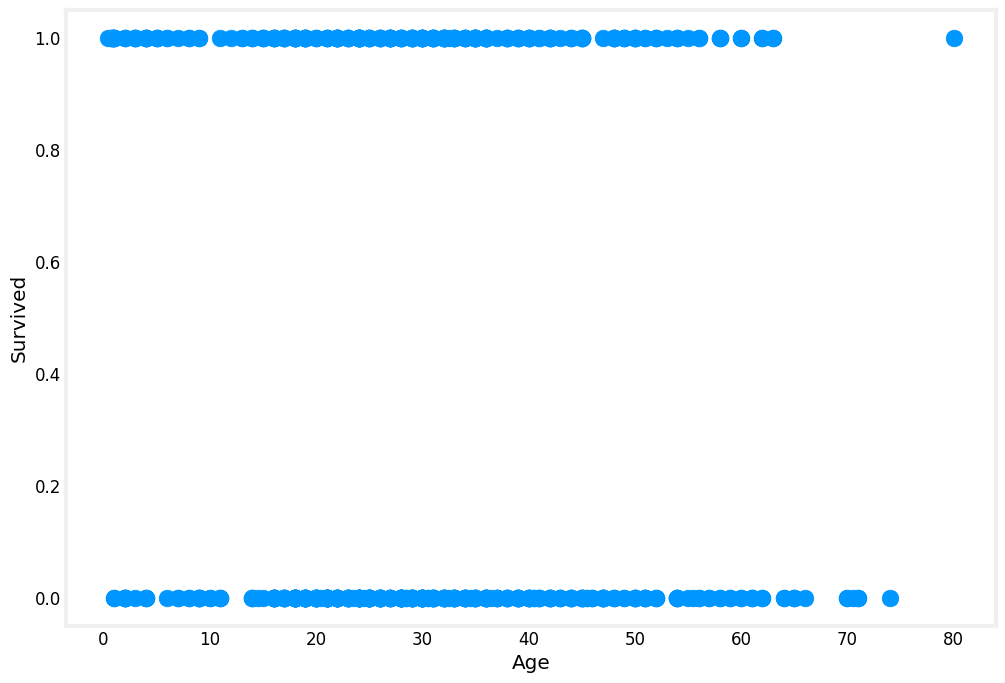

In [2]:
# Visualization of data
file_path = './data/train.csv'
pdv = pd.read_csv(file_path)
plt.scatter(pdv['Age'], pdv['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [3]:
# Preprocessing data
df = modify_data(file_path)

data before processing...
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [4]:
# Splitting data into train and cross validation
X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'The X train and X cv are: {X_train.shape}, {X_cv.shape}')
print(f'The y train and y cv are: {y_train.shape}, {y_cv.shape}')


The X train and X cv are: (712, 28), (179, 28)
The y train and y cv are: (712,), (179,)


In [5]:
# Building a Logistic Regression Model
degree = 3
models = []
polys = []
scalers = []
accuracy_scores = np.zeros((degree, 2))
threshold = 0.6
for i in range(1, degree + 1):
    print(f'Training Model with degree {i}')
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)
    polys.append(poly)
    
    scaler = StandardScaler()
    X_train_mapp = scaler.fit_transform(X_train_poly)
    X_cv_mapp = scaler.transform(X_cv_poly)
    scalers.append(scaler)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_mapp, y_train)
    models.append(model)
    
    yhat = model.predict_proba(X_train_mapp)[:, 1]
    yhat = np.where(yhat >= threshold, 1, 0)
    accuracy_scores[i-1, 0] = accuracy_score(y_train, yhat)
    
    yhat_cv = model.predict_proba(X_cv_mapp)[:, 1]
    yhat_cv = np.where(yhat_cv >= threshold, 1, 0)
    accuracy_scores[i-1, 1] = accuracy_score(y_cv, yhat_cv)
    
print('Results: ')
for i in range (degree): 
    print(f'Degree {i+1}: Accuracy Score: {accuracy_scores[i]}')

Training Model with degree 1
Training Model with degree 2
Training Model with degree 3
Results: 
Degree 1: Accuracy Score: [0.82162921 0.81005587]
Degree 2: Accuracy Score: [0.87219101 0.80446927]
Degree 3: Accuracy Score: [0.89044944 0.79888268]


In [6]:
# Scaling the training input
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train)
X_cv_nn = scaler_nn.transform(X_cv)

In [7]:
# Training the neural network model
nn_model = build_model()

accuracy_scores_nn = np.zeros((3,2))

for i in range(len(nn_model)):
    lss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    nn_model[i].compile(loss=lss, optimizer=optimizer)
    
    threshold = 0.6

    print(f'Training {nn_model[i].name}...')
    
    nn_model[i].fit(X_train_nn, y_train, epochs=200, verbose=0)

    print(f'Done Training {nn_model[i].name} \n ')
    yhat_nn = nn_model[i].predict(X_train_nn)
    yhat_nn = tf.math.sigmoid(yhat_nn)
    yhat_nn = np.where(yhat_nn >= threshold, 1, 0)
    accuracy_scores_nn[i, 0] = accuracy_score(y_train, yhat_nn)
    
    yhat_cv_nn = nn_model[i].predict(X_cv_nn)
    yhat_cv_nn = tf.math.sigmoid(yhat_cv_nn)
    yhat_cv_nn = np.where(yhat_cv_nn >= threshold, 1, 0)
    accuracy_scores_nn[i-1, 1] = accuracy_score(y_cv, yhat_cv_nn)
    
    
for i in range(len(nn_model)):
    print(f'For {nn_model[i].name}: Accuracy Score: {accuracy_scores_nn[i]}')
    

I0000 00:00:1737324343.723028   21541 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2609 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Training model1...


I0000 00:00:1737324344.826009   21630 service.cc:148] XLA service 0x7d206c00b9e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737324344.826035   21630 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-01-19 23:05:44.843245: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737324344.953913   21630 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1737324345.777690   21630 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Done Training model1 
 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Training model2...
Done Training model2 
 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Training model3...
Done Training model3 
 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
For model1: Accuracy Score: [0.89606742 0.80446927]
For model2: Accuracy Score: [0.9002809  0.78212291]
For model3: Accuracy Score: [0.88764045 0.77653631]


In [8]:
# Training the random forest model
rf_model = build_rf()
accuracy_scores_rf = np.zeros((3, 2))
rf_threshold = 0.58
r = 0
for model in rf_model:

    model.fit(X_train_nn, y_train)
    
    yhat = model.predict_proba(X_train_nn)[:, 1]
    yhat = np.where(yhat >= rf_threshold, 1, 0)
    accuracy_scores_rf[r, 0] = accuracy_score(y_train, yhat)

    yhat_cv = model.predict_proba(X_cv_nn)[:, 1]
    yhat_cv = np.where(yhat_cv >= rf_threshold, 1, 0)
    accuracy_scores_rf[r, 1] = accuracy_score(y_cv, yhat_cv)

    r += 1
print('RESULTS: ')
for i in range(len(rf_model)):
    print(f'{rf_model[i].name}: Accuracy Score: {accuracy_scores[i]}')

RESULTS: 
rf1: Accuracy Score: [0.82162921 0.81005587]
rf2: Accuracy Score: [0.87219101 0.80446927]
rf3: Accuracy Score: [0.89044944 0.79888268]


In [27]:
# Training the xgboost model
xg_model = build_xgboost()
accuracy_scores_xg = np.zeros((3, 2))
xg_threshold = 0.4
x = 0
for model in xg_model:

    model.fit(X_train, y_train)

    yhat = model.predict_proba(X_train_nn)[:, 1]
    yhat = np.where(yhat >= xg_threshold, 1, 0)
    accuracy_scores_xg[x, 0] = accuracy_score(y_train, yhat)

    yhat_cv = model.predict_proba(X_cv_nn)[:, 1]
    yhat_cv = np.where(yhat_cv >= xg_threshold, 1, 0)
    accuracy_scores_xg[x, 1] = accuracy_score(y_cv, yhat_cv)

    x += 1

print('RESULTS: ')
for i in range(len(xg_model)):
    print(f'{xg_model[i].name}: Accuracy Score: {accuracy_scores_xg[i]}')

RESULTS: 
xgb1: Accuracy Score: [0.37780899 0.41340782]
xgb2: Accuracy Score: [0.37640449 0.41340782]
xgb3: Accuracy Score: [0.37640449 0.41340782]


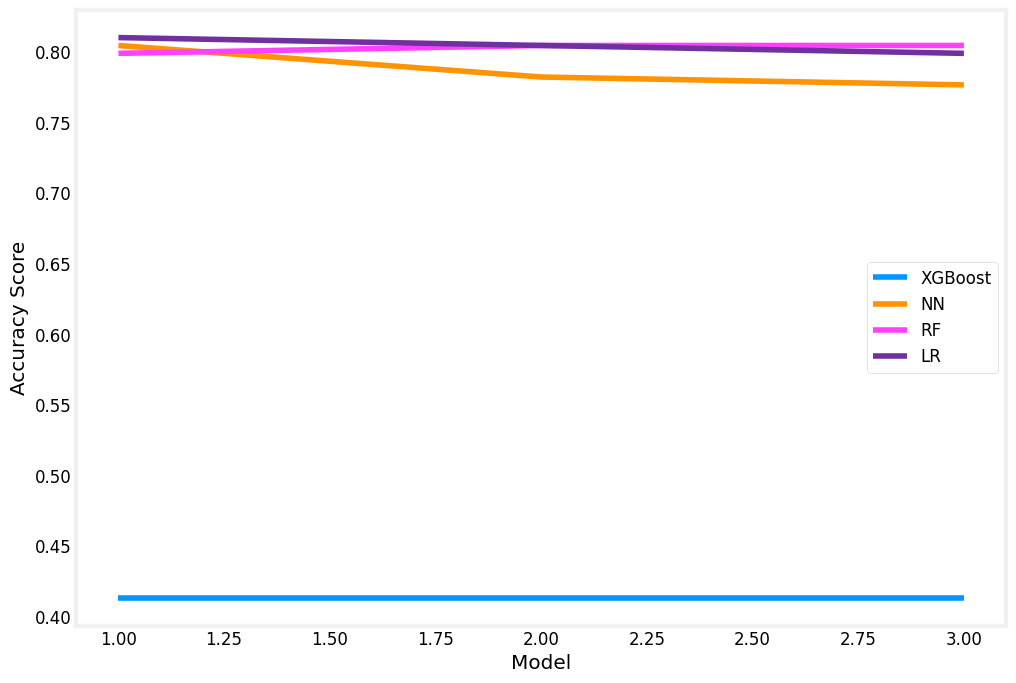

In [24]:
# Visualizing the results
plt.plot(range(1, 4), accuracy_scores_xg[:, 1], label='XGBoost')
plt.plot(range(1, 4), accuracy_scores_nn[:, 1], label='NN')
plt.plot(range(1, 4), accuracy_scores_rf[:, 1], label='RF')
plt.plot(range(1, 4), accuracy_scores[:, 1], label='LR')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [25]:
# Cleaning the test data
test_data = './data/test.csv'
test = modify_data(test_data, columns_reference=X.columns)
X_test = test

print(X_test[:3])

data before processing...
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
data after processing...
    Age     Fare  Embarked_Q  Embarked_S  Embarked_Unknown  Parch_1  Parch_2  \
0  34.5   7.8292        True       False      

In [26]:
# Selecting the best model for prediction
log_cv = accuracy_scores[np.argmax(accuracy_scores[:, 1]), 1]
nn_cv = accuracy_scores_nn[np.argmax(accuracy_scores_nn[:, 1]), 1]
rf_cv = accuracy_scores_rf[np.argmax(accuracy_scores_rf[:, 1]), 1]
xg_cv = accuracy_scores_xg[np.argmax(accuracy_scores_xg[:, 1]), 1]

print(f'Accuracy score for logistic regression model {log_cv}')
print(f'Accuracy score for neural network model {nn_cv}')
print(f'Accuracy score for random forest model {rf_cv}')
print(f'Accuracy score for xgboost model {xg_cv}')


Accuracy score for logistic regression model 0.8100558659217877
Accuracy score for neural network model 0.8044692737430168
Accuracy score for random forest model 0.8044692737430168
Accuracy score for xgboost model 0.4134078212290503


In [17]:
# Selecting the best model for prediction
X_test = scaler_nn.transform(X_test)
yhat_test = best_model.predict(X_test)
yhat_test = tf.math.sigmoid(yhat_test)
yhat_test = np.where(yhat_test >= threshold, 1, 0)
print(yhat_test[:10])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [18]:
# Saving the predictions
df_sub = pd.read_csv('./data/gender_submission.csv')
df_sub['Survived'] = yhat_test

df_sub.to_csv('./data/submission.csv', index=False)